<h1 style='text-align: center;'>Laptop Price Predictor</h1>

<center><img src="https://howtodrawforkids.com/wp-content/uploads/2021/12/how-to-draw-a-laptop.jpg" alt="Laptop Image" width="400"></center>


### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import pickle

### Reading the Dataset

In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Data Preprocessing

In [6]:
#Removing Unwanted Columns

In [7]:
#Company Name 
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [8]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [9]:
df.shape

(1303, 12)

In [10]:
df.size

15636

In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().mean()*100

Unnamed: 0          0.0
Company             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price               0.0
dtype: float64

In [13]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [14]:
df = df.drop_duplicates()

In [15]:
#RAM column 
df['Ram'] = df['Ram'].str.replace('GB', '')

In [16]:
df['Ram'] = df['Ram'].astype('int32')

In [17]:
#Weight column 
df['Weight'] = df['Weight'].str.replace('kg', '')

In [18]:
df['Weight'] = df['Weight'].astype('float32')

In [19]:
df = df.rename(columns={'Ram': 'RAM', 'Cpu': 'CPU', 'OpSys': 'operating_system','Gpu': 'GPU'})


<Axes: xlabel='Price', ylabel='Density'>

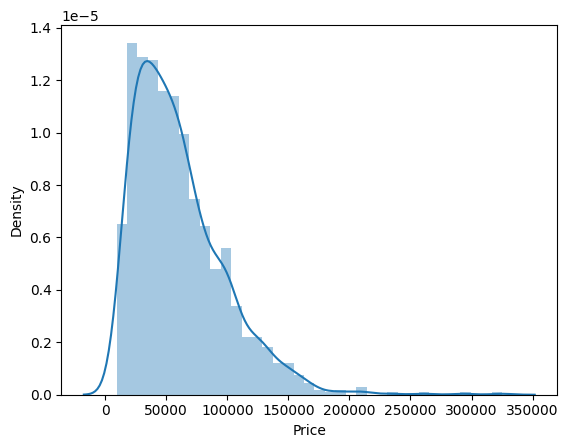

In [20]:
sb.distplot(df['Price'])

<b>We can Observe that our target column (Price) has Right Skewness</b>

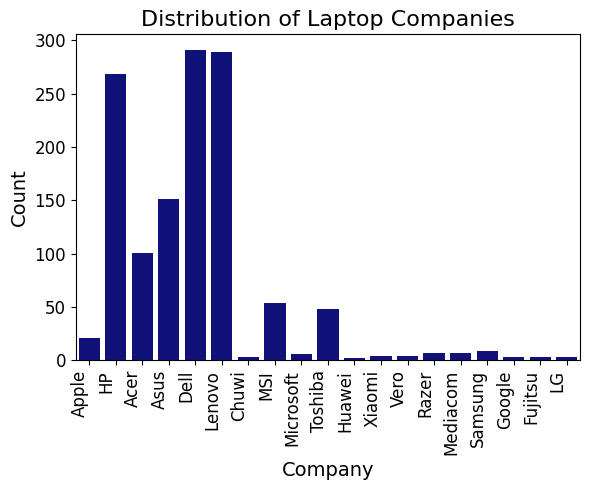

In [21]:
plt.figure(figsize=(6, 5))
sb.countplot(x='Company', data=df, color='darkblue')
plt.title('Distribution of Laptop Companies', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)  # Rotate x-labels by 45 degrees and align them to the right
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

<h2>Laptop Market Analysis</h2>
    <p>The data illustrates a diverse distribution of laptop models among various companies, with Dell, Lenovo, and HP leading in market share. Dell and Lenovo emerge as direct competitors, while other significant players include MSI. Companies like Apple, Samsung, Razer, and Mediacom have fewer listed models, suggesting a more targeted product lineup. Additionally, emerging players like Xiaomi, Vero, Chuwi, Google, Fujitsu, LG, and Huawei indicate potential newcomers or niche market focuses. This distribution sheds light on the competitive dynamics of the laptop market, showcasing established brands alongside emerging contenders.</p>
  </div>

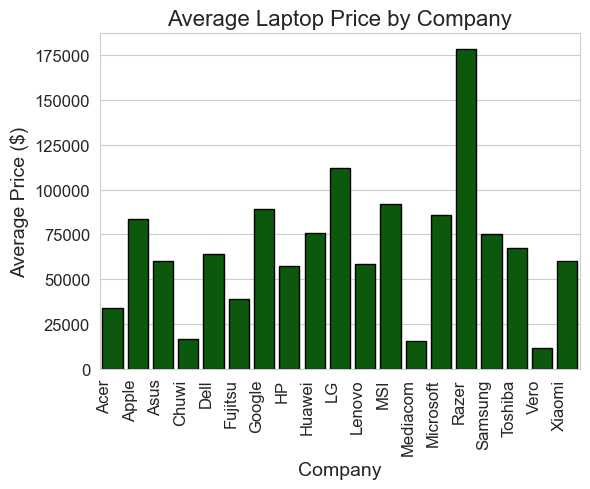

In [22]:
sb.set_style("whitegrid")

# Calculate the average price for each company
avg_prices = df.groupby('Company')['Price'].mean().reset_index()

# Creating a bar graph of average laptop prices for each company
plt.figure(figsize=(6, 5))
sb.barplot(x='Company', y='Price', data=avg_prices, color='darkgreen', edgecolor='black')
plt.title('Average Laptop Price by Company', fontsize=16)
plt.xlabel('Company', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)  # Rotate x-labels by 45 degrees and align them to the right
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

## Inferences

<h3>Price Variation:</h3>
<ul style="margin-top: 0;">
  <li style="font-size: 14px;">There is significant variation in the average prices of laptops across different companies.</li>
  <li style="font-size: 14px;">For example, the average price of Razer laptops is much higher compared to other brands like Acer or Chuwi.</li>
</ul>

<h3>Premium Brands:</h3>
<ul style="margin-top: 0;">
  <li style="font-size: 14px;">Companies like Apple, Microsoft, and Razer are known for producing premium laptops with higher prices, as reflected in the data.</li>
</ul>

<h3>Mid-range Options:</h3>
<ul style="margin-top: 0;">
  <li style="font-size: 14px;">Brands like Asus, Dell, HP, Lenovo, and Samsung seem to offer laptops with more moderate prices, catering to a broader range of consumers.</li>
</ul>

<h3>Value for Money:</h3>
<ul style="margin-top: 0;">
  <li style="font-size: 14px;">Companies like Acer, Asus, and Xiaomi appear to offer laptops with relatively lower average prices, potentially providing better value for money or targeting budget-conscious consumers.</li>
</ul>
umers.</li>
</ul>
mers.</p>


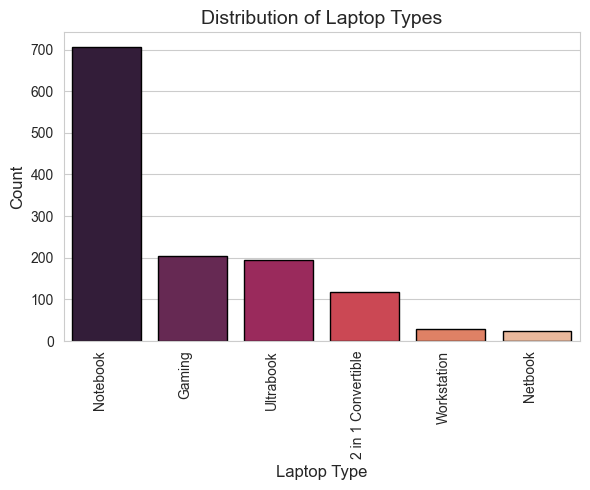

In [23]:
type_counts = df['TypeName'].value_counts()
sb.set_style("whitegrid")

# Create bar plot with reduced size and a different color palette
plt.figure(figsize=(6, 5))
sb.barplot(x=type_counts.index, y=type_counts.values, palette=sb.color_palette("rocket"), edgecolor='black',ci=None)
plt.title('Distribution of Laptop Types', fontsize=14)
plt.xlabel('Laptop Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

<h2>Laptop Type Distribution</h2>
    <p>The dataset showcases the distribution of laptops across various types. "Notebook" laptops dominate, reflecting widespread usage of traditional models. Gaming laptops are also prevalent, catering to the demand for high-performance gaming machines. Ultrabooks, valued for their slim design and portability, and 2 in 1 Convertible laptops, offering dual functionality, are gaining popularity. However, Workstation and Netbook laptops have a limited presence, indicating niche usage. Overall, the dataset underscores diverse consumer preferences and market trends in laptops.</p>

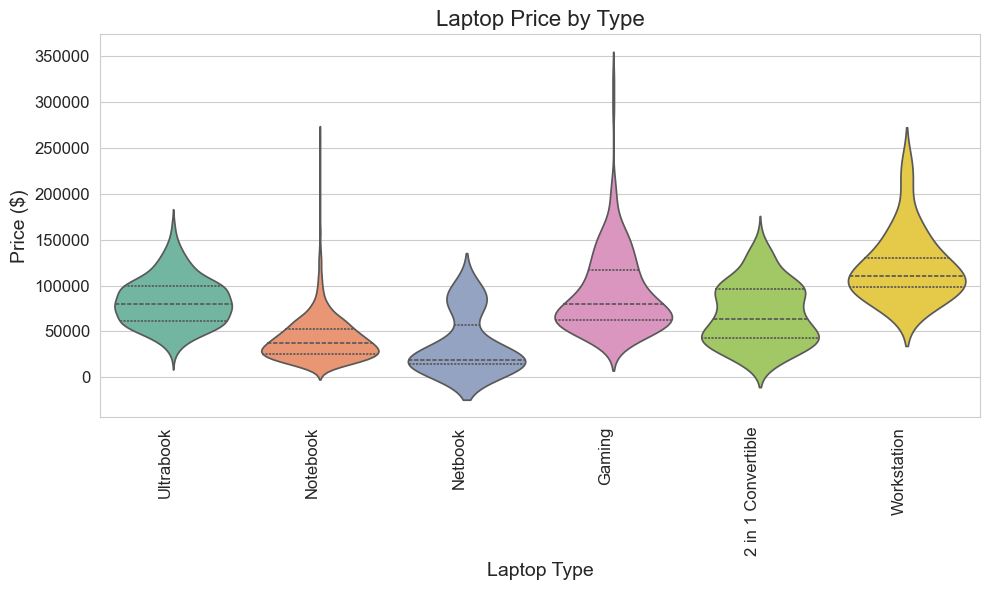

In [24]:
sb.set_style("whitegrid")

# Create violin plot
plt.figure(figsize=(10, 6))
sb.violinplot(x='TypeName', y='Price', data=df, palette='Set2', inner='quartile')
plt.title('Laptop Price by Type', fontsize=16)
plt.xlabel('Laptop Type', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

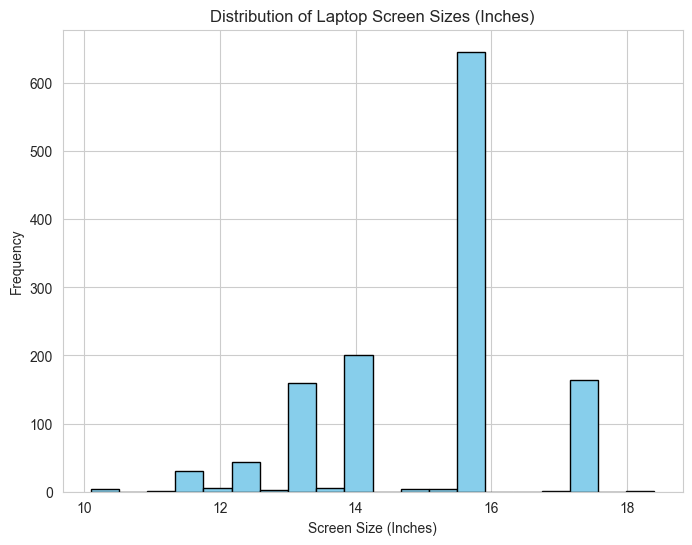

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(df['Inches'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Laptop Screen Sizes (Inches)')
plt.xlabel('Screen Size (Inches)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<div>
  <h3>Screen Size Summary</h3>
  <p>The most common screen sizes are 15.6 inches, followed by 14.0 inches, and 17.3 inches. These sizes likely represent standard laptop screen sizes commonly found in the market.</p>
</div>


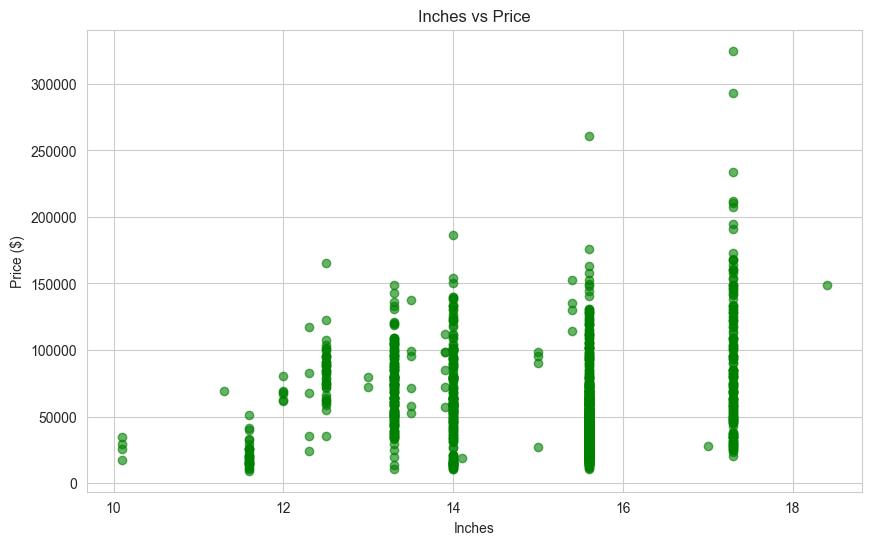

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Inches'], df['Price'], color='green', alpha=0.6)
plt.title('Inches vs Price')
plt.xlabel('Inches')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

<div>
  <h3>Screen Size vs Average Price</h3>
  <p>Smaller screen sizes such as 10.1 inches, 11.3 inches, and 11.6 inches tend to have lower average prices, suggesting that laptops with smaller screens may be more budget-friendly options.</p>
  <p>Larger screen sizes such as 15.4 inches, 17.0 inches, and 18.4 inches have relatively higher average prices, indicating that laptops with larger screens may belong to higher-end or specialized categories, such as gaming laptops or professional workstations.</p>
  <p>Screen sizes in the mid-range, such as 13.3 inches, 14.0 inches, and 15.6 inches, have average prices that fall between the extremes, indicating a balance between performance, portability, and price.</p>
</div>

In [27]:
#ScreenResolution = Touch Screen + non Touch Screen

In [28]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [29]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,CPU,RAM,Memory,GPU,operating_system,Weight,Price,Touchscreen
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,38378.6496,0
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0


<Axes: xlabel='Touchscreen'>

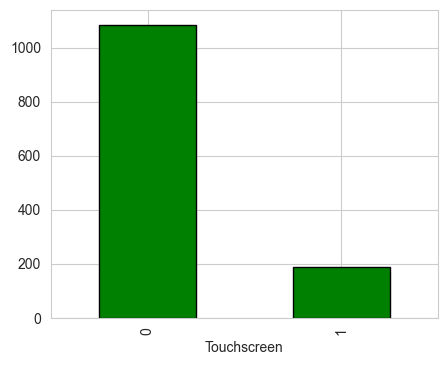

In [30]:
df['Touchscreen'].value_counts().plot(kind='bar', figsize=(5, 4), color='green', edgecolor='black')


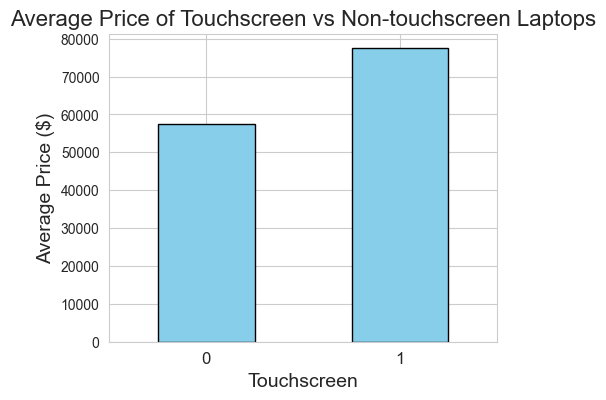

In [31]:
avg_price_by_touchscreen = df.groupby('Touchscreen')['Price'].mean()

# Creating a bar plot
plt.figure(figsize=(5, 4))
avg_price_by_touchscreen.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price of Touchscreen vs Non-touchscreen Laptops', fontsize=16)
plt.xlabel('Touchscreen', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

# Displaying the plot
plt.show()

<div>
  <p>We can infer that touchscreen laptops tend to be more expensive compared to non-touchscreen laptops. This price difference likely reflects the additional cost associated with the touchscreen feature, which involves specialized hardware and technology.</p>
</div>

In [32]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='IPS'>

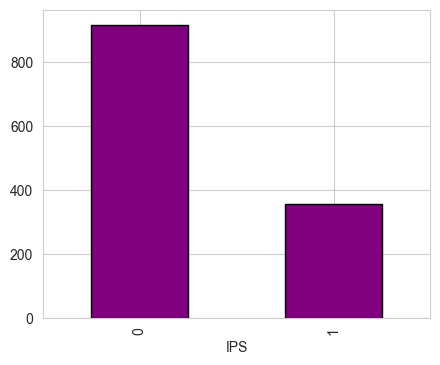

In [33]:
df['IPS'].value_counts().plot(kind='bar', figsize=(5, 4), color='purple', edgecolor='black')


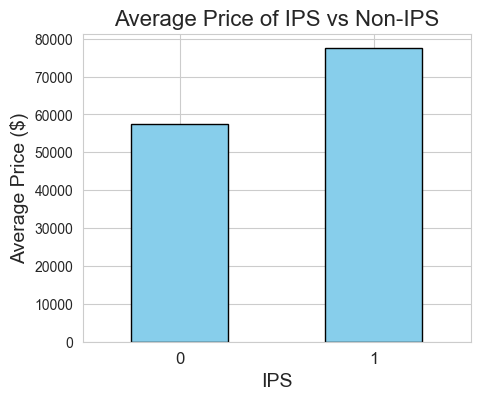

In [34]:
avg_price_by_IPS = df.groupby('IPS')['Price'].mean()

# Creating a bar plot
plt.figure(figsize=(5, 4))
avg_price_by_touchscreen.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Price of IPS vs Non-IPS', fontsize=16)
plt.xlabel('IPS', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

# Displaying the plot
plt.show()

<div>
  <p>Based on the provided data, it appears that laptops with IPS (In-Plane Switching) panels have a higher average price compared to those without IPS panels. This price disparity suggests that laptops equipped with IPS panels may offer better display quality or other premium features, contributing to their higher cost.</p>
</div>

In [35]:
#Calculation X resolution and Y Resolution 

In [36]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1269,1366,768
1270,IPS Panel Full HD / Touchscreen 1920,1080
1271,IPS Panel Quad HD+ / Touchscreen 3200,1800
1272,1366,768


In [37]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [38]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+.?\d+)').apply(lambda x:x[0])

In [39]:
df.head(10)

,Company,TypeName,Inches,ScreenResolution,CPU,RAM,Memory,GPU,operating_system,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,1366,768
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,2880,1800
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,1440,900
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,1920,1080
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,1920,1080


In [40]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   CPU               1274 non-null   object 
 5   RAM               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   GPU               1274 non-null   object 
 8   operating_system  1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  X_res             1274 non-null   int32  
 14  Y_res             1274 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 171.6+ KB


In [42]:
#PPI (Pixels Per Inch)

In [43]:
import math

def calculate_ppi(row):
    horizontal_resolution = row['X_res']
    vertical_resolution = row['Y_res']
    screen_size_inches = row['Inches']
    PPI = math.sqrt(horizontal_resolution ** 2 + vertical_resolution ** 2) / screen_size_inches
    return PPI


df['PPI'] = df.apply(lambda row: calculate_ppi(row), axis=1)


In [44]:
df.drop(columns = ['ScreenResolution','X_res','Y_res','Inches'],inplace = True)

In [45]:
df['CPU'].value_counts()

CPU
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

In [46]:
df['CPU name'] = df['CPU'].apply(lambda x:" ".join(x.split()[0:3]))

In [47]:
def processor_type(sentence):
    if sentence == 'Intel Core i7' or  sentence == 'Intel Core i5' or sentence == 'Intel Core i3':
        return sentence
    else:
        if sentence.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
            



In [48]:
df['CPU_Brand'] = df['CPU name'].apply(processor_type)

<Axes: xlabel='CPU_Brand'>

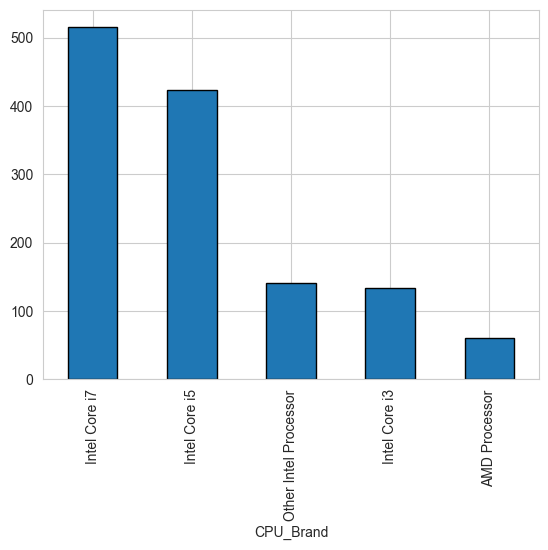

In [49]:
df['CPU_Brand'].value_counts().plot(kind = 'bar',edgecolor='black')

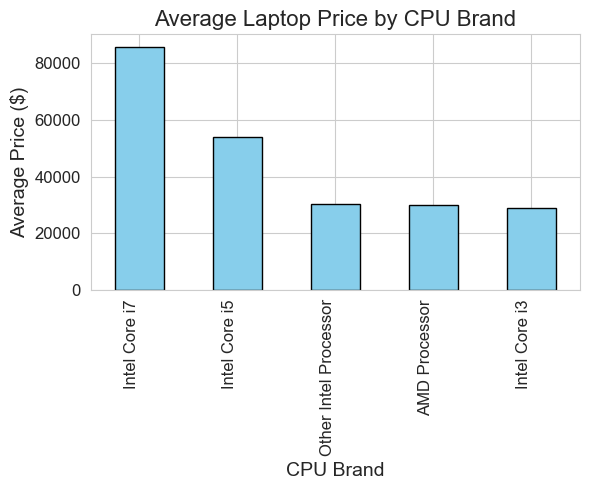

In [50]:
avg_price_by_cpu_brand = df.groupby('CPU_Brand')['Price'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(6, 5))
avg_price_by_cpu_brand.plot(kind='bar', color='skyblue', edgecolor='black') 
plt.title('Average Laptop Price by CPU Brand', fontsize=16)
plt.xlabel('CPU Brand', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [51]:
df.drop(columns = ['CPU','CPU name'],inplace = True)

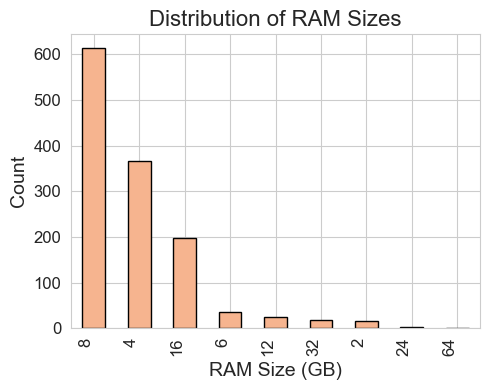

In [52]:
sb.set_palette("rocket_r")

# Calculate counts of each RAM size
ram_counts = df['RAM'].value_counts()

# Plotting
plt.figure(figsize=(5, 4))
ram_counts.plot(kind='bar', edgecolor='black')  # Removed color argument
plt.title('Distribution of RAM Sizes', fontsize=16)
plt.xlabel('RAM Size (GB)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

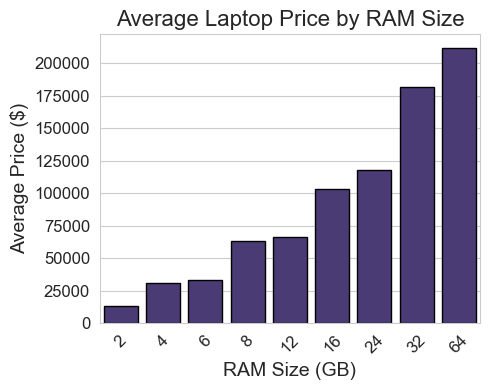

In [53]:
avg_price_by_ram = df.groupby('RAM')['Price'].mean().reset_index()


sb.set_palette("viridis")

# Create bar plot
plt.figure(figsize=(5, 4))
sb.barplot(x='RAM', y='Price', data=avg_price_by_ram,edgecolor='black')
plt.title('Average Laptop Price by RAM Size', fontsize=16)
plt.xlabel('RAM Size (GB)', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Conclusion

<ul>
  <li>Laptops with higher RAM sizes tend to have higher average prices.</li>
  <li>There is a clear trend of increasing average price as the RAM size increases, indicating that more RAM typically comes with a higher price tag.</li>
  <li>For example, laptops with 64GB of RAM have the highest average price among the listed RAM sizes, followed by laptops with 32GB of RAM.</li>
  <li>Conversely, laptops with lower RAM sizes such as 2GB and 4GB have significantly lower average prices, suggesting that they are more budget-friendly options.</li>
  <li>This correlation between RAM size and price reflects the importance of RAM capacity in determining the overall performance and capabilities of a laptop, with higher RAM configurations catering to more demanding tasks and users willing to pay a premium for enhanced performance.</li>
</ul>

In [54]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [55]:
# Creating the new attributes from Memory column

In [56]:
import re

# Replace '.0' with an empty string
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

# Remove 'GB' and replace 'TB' with '000'
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

# Split the Memory column into two columns based on '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# Extract the first storage type and size
df["first"] = new[0].str.strip()
df['first_size'] = df['first'].apply(lambda x: float(re.findall(r'\d+', x)[0]) if pd.notnull(x) else None)

# Extract the second storage type and size
df["second"] = new[1].fillna("0").str.strip()
df['second_size'] = df['second'].apply(lambda x: float(re.findall(r'\d+', x)[0]) if pd.notnull(x) else None)

# Determine the presence of each storage type in the first and second columns
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Calculate the total size for each storage type
df["HDD"] = (df["first_size"] * df["Layer1HDD"] + df["second_size"] * df["Layer2HDD"])
df["SSD"] = (df["first_size"] * df["Layer1SSD"] + df["second_size"] * df["Layer2SSD"])
df["Hybrid"] = (df["first_size"] * df["Layer1Hybrid"] + df["second_size"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first_size"] * df["Layer1Flash_Storage"] + df["second_size"] * df["Layer2Flash_Storage"])

# Drop intermediate columns
df.drop(columns=['first', 'first_size', 'second', 'second_size', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)


In [57]:
df.head()

,Company,TypeName,RAM,Memory,GPU,operating_system,Weight,Price,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,0.0,0.0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,0.0,128.0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,0.0,0.0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,0.0,0.0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,0.0,0.0


In [58]:
df.sample(10)

,Company,TypeName,RAM,Memory,GPU,operating_system,Weight,Price,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD,Hybrid,Flash_Storage
860,Lenovo,Notebook,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.30,45323.1648,0,1,141.211998,Intel Core i5,1000.0,0.0,0.0,0.0
564,Asus,Notebook,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,44701.9200,0,0,141.211998,Intel Core i5,1000.0,128.0,0.0,0.0
288,Lenovo,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,62817.1200,0,1,141.211998,Intel Core i7,1000.0,256.0,0.0,0.0
892,Samsung,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.17,90522.7200,0,0,146.860478,Intel Core i7,0.0,256.0,0.0,0.0
421,Chuwi,Notebook,6,64 Flash Storage,Intel HD Graphics 500,Windows 10,1.40,23922.7200,0,1,267.338436,Other Intel Processor,0.0,0.0,0.0,64.0
718,Mediacom,Notebook,4,32 HDD,Intel HD Graphics 400,Windows 10,1.40,14119.2000,0,1,161.725391,Other Intel Processor,32.0,0.0,0.0,0.0
704,Lenovo,Notebook,4,500 HDD,Intel HD Graphics 520,No OS,1.90,23976.0000,0,0,100.454670,Intel Core i3,500.0,0.0,0.0,0.0
1228,Lenovo,Gaming,16,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,54825.1200,1,1,141.211998,Intel Core i7,1000.0,128.0,0.0,0.0
803,Dell,Notebook,8,256 SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,93186.7200,1,0,282.423996,Intel Core i5,0.0,256.0,0.0,0.0
989,Dell,Notebook,8,128 SSD,Intel HD Graphics 620,Windows 10,1.60,59620.3200,0,0,157.350512,Intel Core i5,0.0,128.0,0.0,0.0


In [59]:
df.drop(columns = ['Memory'],inplace = True)

## Correlation Matrix

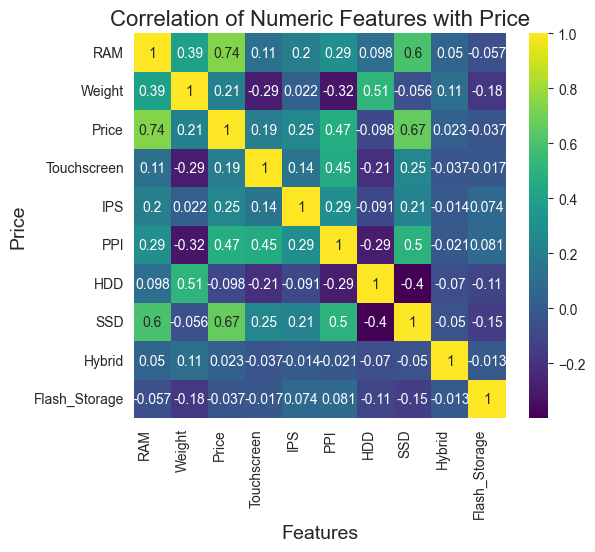

In [60]:
non_numeric_columns = df.apply(pd.to_numeric, errors='coerce').isnull().any()
non_numeric_columns = non_numeric_columns[non_numeric_columns].index.tolist()
df_numeric = df.drop(columns=non_numeric_columns)
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(6,5))
sb.heatmap(correlation_matrix, annot=True, cmap='viridis', cbar=True)  # Using the 'viridis' color palette
plt.title('Correlation of Numeric Features with Price', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.show()

<h2>Correlation Analysis</h2>
        <p>Based on the correlation coefficients between the features and the price:</p>
        <ul>
            <li><strong>Strong Positive Correlation (Close to 1):</strong> RAM (0.74)</li>
            <li><strong>Moderate Positive Correlation:</strong> SSD (0.66), PPI (0.46), IPS (0.25)</li>
            <li><strong>Weak Positive Correlation:</strong> Touchscreen (0.18)</li>
            <li><strong>Weak Negative Correlation:</strong> HDD (-0.09)</li>
            <li><strong>Negligible Correlation:</strong> Weight (0.21), Hybrid (0.022), Flash_Storage (-0.037)</li>
        </ul>
<p>Considering the correlations, dropping the 'Hybrid' and 'Flash_Storage' columns, as they have very weak correlations with the price.</p>

In [61]:
df.drop(columns = ['Hybrid', 'Flash_Storage'],inplace = True)

In [62]:
df['GPU'].value_counts()

GPU
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [63]:
#GPU 
df['GPU Brand'] =df['GPU'].apply(lambda x:x.split()[0])

In [64]:
df['GPU Brand'].value_counts()

GPU Brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [65]:
df = df[df['GPU Brand'] != 'ARM']

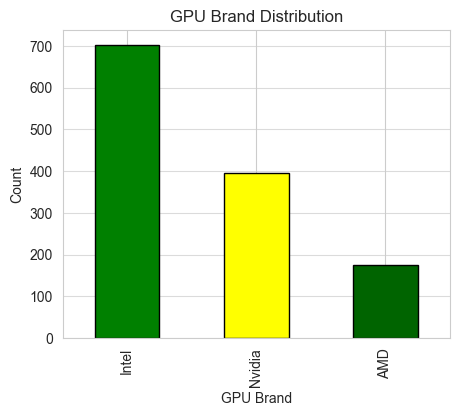

In [66]:
gpu_brand_counts = df['GPU Brand'].value_counts()

plt.figure(figsize=(5, 4))
gpu_brand_counts.plot(kind='bar', color=['green', 'yellow', 'darkgreen'],edgecolor = 'black')
plt.title('GPU Brand Distribution')
plt.xlabel('GPU Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.7)
plt.show()

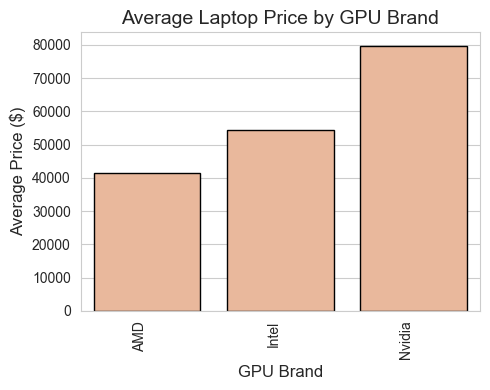

In [67]:
avg_price_by_gpu_brand = df.groupby('GPU Brand')['Price'].mean().reset_index()

# Set Seaborn style and color palette
sb.set_palette("rocket_r")

# Create bar plot
plt.figure(figsize=(5, 4))
sb.barplot(x='GPU Brand', y='Price', data=avg_price_by_gpu_brand,edgecolor = 'black')
plt.title('Average Laptop Price by GPU Brand', fontsize=14)
plt.xlabel('GPU Brand', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

<p>The average price of laptops with Nvidia GPUs is significantly higher than those with AMD GPUs and Intel GPUs.</p>

In [68]:
df.drop(columns = ['GPU'],inplace = True)

In [69]:
#Operating System 
df['operating_system'].value_counts()

operating_system
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [70]:
def categorize_os(os):
    if 'Windows' in os or 'Windows' in os:
        return 'Windows'
    elif 'Mac OS X' in os or 'macOS' in os:
        return 'Mac'
    else:
        return 'Other'

In [71]:
df['OS_Category'] = df['operating_system'].apply(categorize_os)

In [72]:
df['OS_Category'].value_counts()

OS_Category
Windows    1100
Other       152
Mac          21
Name: count, dtype: int64

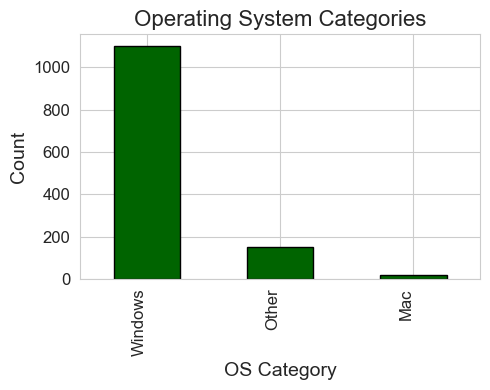

In [73]:
os_counts = df['OS_Category'].value_counts()

# Plot a bar plot
plt.figure(figsize=(5, 4))
os_counts.plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title('Operating System Categories', fontsize=16)
plt.xlabel('OS Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

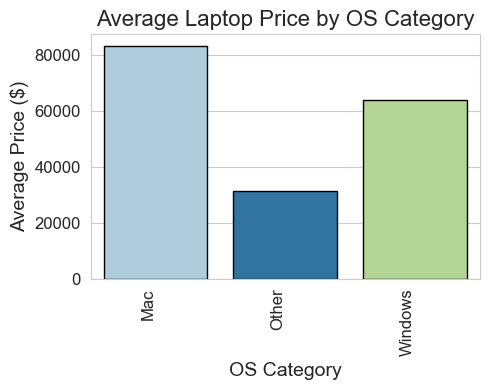

In [74]:
avg_price_by_os_category = df.groupby('OS_Category')['Price'].mean().reset_index()
custom_palette = sb.color_palette("Paired")

# Plotting
plt.figure(figsize=(5, 4))
sb.barplot(x='OS_Category', y='Price', data=avg_price_by_os_category, palette=custom_palette,edgecolor='black')
plt.title('Average Laptop Price by OS Category', fontsize=16)
plt.xlabel('OS Category', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [75]:
df.drop(columns = ['operating_system'],inplace = True)

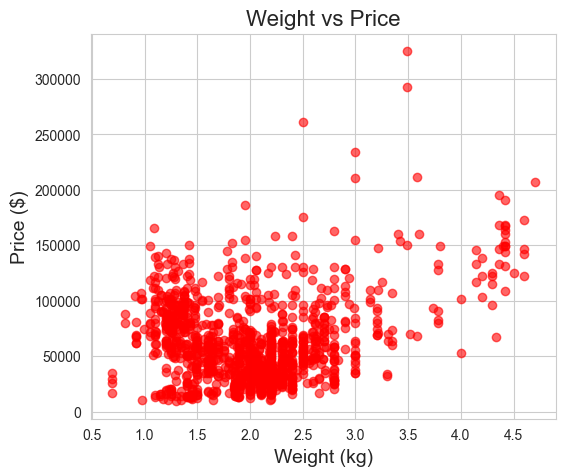

In [76]:
#Weight vs Price

plt.figure(figsize=(6, 5))
plt.scatter(df['Weight'], df['Price'], color='red', alpha=0.6)
plt.title('Weight vs Price', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(True)
plt.show()

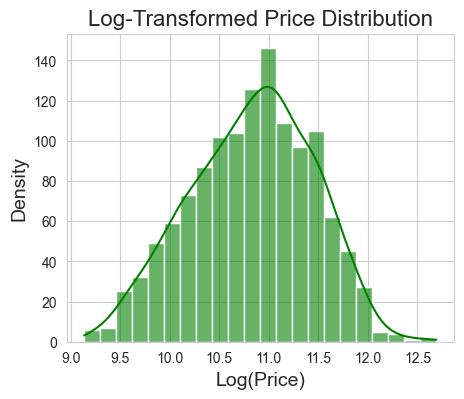

In [77]:
#Transformation of Price (Normal)

plt.figure(figsize=(5, 4))
sb.histplot(np.log(df['Price']), kde=True, color='green', alpha=0.6)
plt.title('Log-Transformed Price Distribution', fontsize=16)
plt.xlabel('Log(Price)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()

In [78]:
X = df.drop(columns = ['Price'])
Y = np.log(df['Price'])

In [79]:
X

,Company,TypeName,RAM,Weight,Touchscreen,IPS,PPI,CPU_Brand,HDD,SSD,GPU Brand,OS_Category
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Other
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,0,0,100.454670,Intel Core i7,500.0,0.0,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0.0,128.0,Intel,Windows
1271,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0.0,512.0,Intel,Windows
1272,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0.0,0.0,Intel,Windows


In [80]:
Y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1273, dtype: float64

## Train-Test Splitting

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Modeling

## 1)LinearRegression

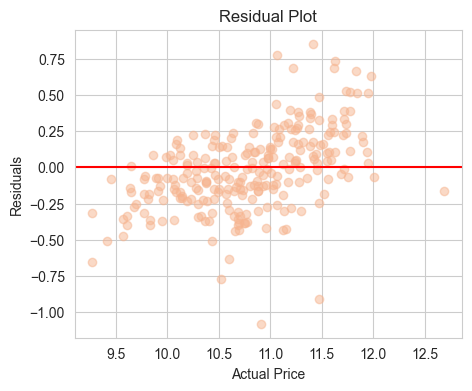

Model Evaluation:
----------------------------------
R2 Score: 0.8048230699268192
Mean Absolute Error: 0.21518662579645836

Additional Information:
-----------------------
Average Actual Price: $10.793331049608089
Average Predicted Price: $10.811883901944027
Standard Deviation of Actual Price: $0.6293835414224095
Standard Deviation of Predicted Price: $0.5500879758412385


In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, Y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Calculate metrics
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Calculate residuals
residuals = Y_test - y_pred

# Plot the residuals
plt.figure(figsize=(5, 4))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.title('Residual Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Print model evaluation metrics
print('Model Evaluation:')
print('----------------------------------')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print()

# Additional information
print('Additional Information:')
print('-----------------------')
print(f'Average Actual Price: ${np.mean(Y_test)}')
print(f'Average Predicted Price: ${np.mean(y_pred)}')
print(f'Standard Deviation of Actual Price: ${np.std(Y_test)}')
print(f'Standard Deviation of Predicted Price: ${np.std(y_pred)}')

## 2)Ridge Regression

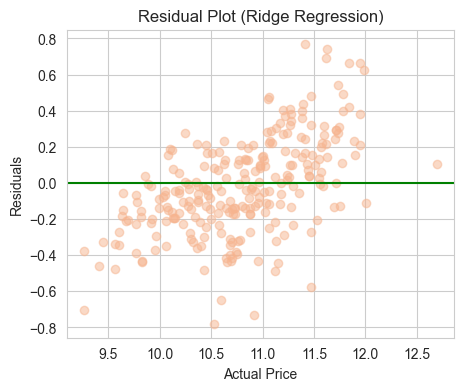

Ridge Regression Model Evaluation:
----------------------------------
R2 Score: 0.8187754246777146
Mean Absolute Error: 0.2124187402010785

Additional Information:
-----------------------
Average Actual Price: $10.793331049608089
Average Predicted Price: $10.812525751822196
Standard Deviation of Actual Price: $0.6293835414224095
Standard Deviation of Predicted Price: $0.5307584273765394


In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train, Y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Calculate metrics
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Calculate residuals
residuals = Y_test - y_pred

# Plot the residuals
plt.figure(figsize=(5, 4))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.title('Residual Plot (Ridge Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='g', linestyle='-')
plt.show()

# Print model evaluation metrics
print('Ridge Regression Model Evaluation:')
print('----------------------------------')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print()

# Additional information
print('Additional Information:')
print('-----------------------')
print(f'Average Actual Price: ${np.mean(Y_test)}')
print(f'Average Predicted Price: ${np.mean(y_pred)}')
print(f'Standard Deviation of Actual Price: ${np.std(Y_test)}')
print(f'Standard Deviation of Predicted Price: ${np.std(y_pred)}')

## 3)Lasso Regression model

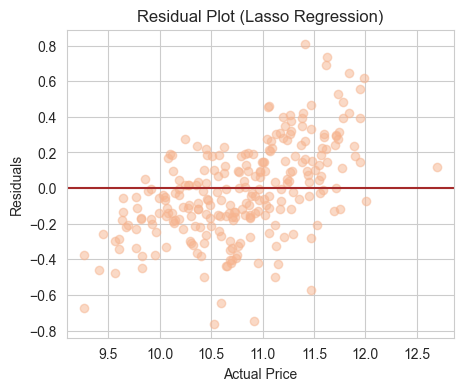

Lasso Regression Model Evaluation:
----------------------------------
R2 Score: 0.8229876457506319
Mean Absolute Error: 0.2103827927048882

Additional Information:
-----------------------
Average Actual Price: $10.793331049608089
Average Predicted Price: $10.8124096479686
Standard Deviation of Actual Price: $0.6293835414224095
Standard Deviation of Predicted Price: $0.5353468103828332


In [84]:
# Lasso Regression
from sklearn.linear_model import Lasso

# Define the preprocessing steps
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Define the Lasso Regression model
step2 = Lasso(alpha=0.001)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, Y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Calculate metrics
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Calculate residuals
residuals = Y_test - y_pred

# Plot the residuals
plt.figure(figsize=(5, 4))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.title('Residual Plot (Lasso Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='brown', linestyle='-')
plt.show()

# Print model evaluation metrics
print('Lasso Regression Model Evaluation:')
print('----------------------------------')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print()

# Additional information
print('Additional Information:')
print('-----------------------')
print(f'Average Actual Price: ${np.mean(Y_test)}')
print(f'Average Predicted Price: ${np.mean(y_pred)}')
print(f'Standard Deviation of Actual Price: ${np.std(Y_test)}')
print(f'Standard Deviation of Predicted Price: ${np.std(y_pred)}')

## 4)RandomForestRegressor

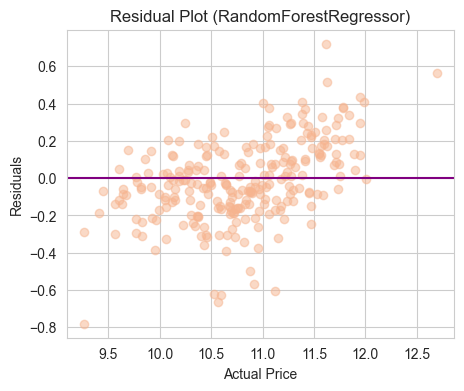

RandomForestRegressor Model Evaluation:
----------------------------------
R2 Score: 0.8806217636292337
Mean Absolute Error: 0.1682838145386916

Additional Information:
-----------------------
Average Actual Price: $10.793331049608089
Average Predicted Price: $10.80851361144507
Standard Deviation of Actual Price: $0.6293835414224095
Standard Deviation of Predicted Price: $0.5617129649551852


In [92]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Define the RandomForestRegressor model
step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, Y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Calculate metrics
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Calculate residuals
residuals = Y_test - y_pred

# Plot the residuals
plt.figure(figsize=(5, 4))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.title('Residual Plot (RandomForestRegressor)')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='purple', linestyle='-')
plt.show()

# Print model evaluation metrics
print('RandomForestRegressor Model Evaluation:')
print('----------------------------------')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print()

# Additional information
print('Additional Information:')
print('-----------------------')
print(f'Average Actual Price: ${np.mean(Y_test)}')
print(f'Average Predicted Price: ${np.mean(y_pred)}')
print(f'Standard Deviation of Actual Price: ${np.std(Y_test)}')
print(f'Standard Deviation of Predicted Price: ${np.std(y_pred)}')

## 5)ExtraTreesRegressor

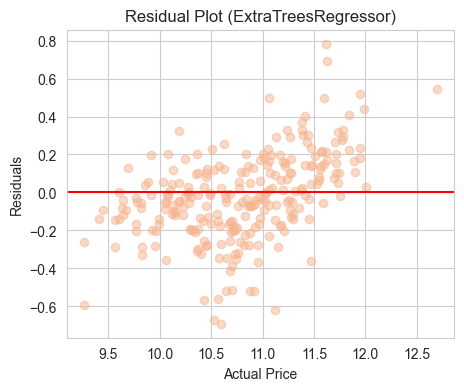

ExtraTreesRegressor Model Evaluation:
----------------------------------
R2 Score: 0.8687261741048711
Mean Absolute Error: 0.17465208736825996

Additional Information:
-----------------------
Average Actual Price: $10.793331049608089
Average Predicted Price: $10.815907811815437
Standard Deviation of Actual Price: $0.6293835414224095
Standard Deviation of Predicted Price: $0.5626598696683084


In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                            random_state=3,
                            bootstrap=True,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, Y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Calculate metrics
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Calculate residuals
residuals = Y_test - y_pred

# Plot the residuals
plt.figure(figsize=(5, 4))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.title('Residual Plot (ExtraTreesRegressor)')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Print model evaluation metrics
print('ExtraTreesRegressor Model Evaluation:')
print('----------------------------------')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print()

# Additional information
print('Additional Information:')
print('-----------------------')
print(f'Average Actual Price: ${np.mean(Y_test)}')
print(f'Average Predicted Price: ${np.mean(y_pred)}')
print(f'Standard Deviation of Actual Price: ${np.std(Y_test)}')
print(f'Standard Deviation of Predicted Price: ${np.std(y_pred)}')

## 6)AdaBoostRegressor

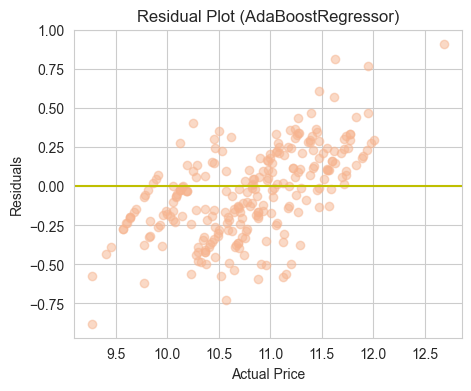

AdaBoostRegressor Model Evaluation:
----------------------------------
R2 Score: 0.7930519150212094
Mean Absolute Error: 0.23120912850384467

Additional Information:
-----------------------
Average Actual Price: $10.793331049608089
Average Predicted Price: $10.83733808906288
Standard Deviation of Actual Price: $0.6293835414224095
Standard Deviation of Predicted Price: $0.5179676449670021


In [87]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

# Define the AdaBoostRegressor model
step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, Y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Calculate metrics
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Calculate residuals
residuals = Y_test - y_pred

# Plot the residuals
plt.figure(figsize=(5, 4))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.title('Residual Plot (AdaBoostRegressor)')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='y', linestyle='-')
plt.show()

# Print model evaluation metrics
print('AdaBoostRegressor Model Evaluation:')
print('----------------------------------')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print()

# Additional information
print('Additional Information:')
print('-----------------------')
print(f'Average Actual Price: ${np.mean(Y_test)}')
print(f'Average Predicted Price: ${np.mean(y_pred)}')
print(f'Standard Deviation of Actual Price: ${np.std(Y_test)}')
print(f'Standard Deviation of Predicted Price: ${np.std(y_pred)}')



## 7)SVM Model

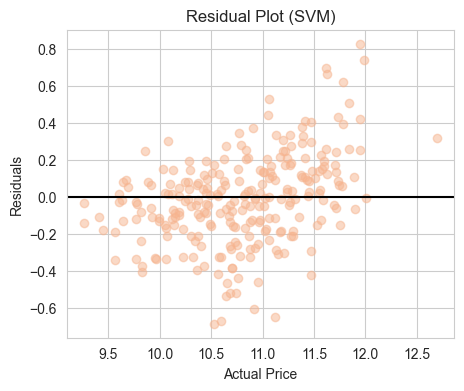

SVM Model Evaluation:
----------------------------------
R2 Score: 0.8494800046595314
Mean Absolute Error: 0.18558051785477023

Additional Information:
-----------------------
Average Actual Price: $10.793331049608089
Average Predicted Price: $10.803946575806261
Standard Deviation of Actual Price: $0.6293835414224095
Standard Deviation of Predicted Price: $0.5801358718697138


In [88]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, Y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Calculate metrics
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Calculate residuals
residuals = Y_test - y_pred

# Plot the residuals
plt.figure(figsize=(5, 4))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.title('Residual Plot (SVM)')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

# Print model evaluation metrics
print('SVM Model Evaluation:')
print('----------------------------------')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print()

# Additional information
print('Additional Information:')
print('-----------------------')
print(f'Average Actual Price: ${np.mean(Y_test)}')
print(f'Average Predicted Price: ${np.mean(y_pred)}')
print(f'Standard Deviation of Actual Price: ${np.std(Y_test)}')
print(f'Standard Deviation of Predicted Price: ${np.std(y_pred)}')


## 8)GradientBoostingRegressor

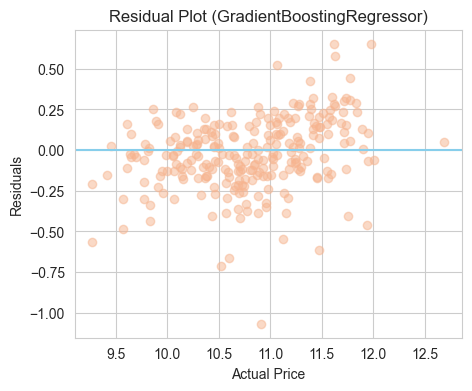

GradientBoostingRegressor Model Evaluation:
----------------------------------
R2 Score: 0.8730468413065783
Mean Absolute Error: 0.17038702737895697

Additional Information:
-----------------------
Average Actual Price: $10.793331049608089
Average Predicted Price: $10.816058937979149
Standard Deviation of Actual Price: $0.6293835414224095
Standard Deviation of Predicted Price: $0.6004622032258142


In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, Y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Calculate metrics
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Calculate residuals
residuals = Y_test - y_pred

# Plot the residuals
plt.figure(figsize=(5, 4))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.title('Residual Plot (GradientBoostingRegressor)')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='skyblue', linestyle='-')
plt.show()

# Print model evaluation metrics
print('GradientBoostingRegressor Model Evaluation:')
print('----------------------------------')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print()

# Additional information
print('Additional Information:')
print('-----------------------')
print(f'Average Actual Price: ${np.mean(Y_test)}')
print(f'Average Predicted Price: ${np.mean(y_pred)}')
print(f'Standard Deviation of Actual Price: ${np.std(Y_test)}')
print(f'Standard Deviation of Predicted Price: ${np.std(y_pred)}')


## 9)XGBRegressor

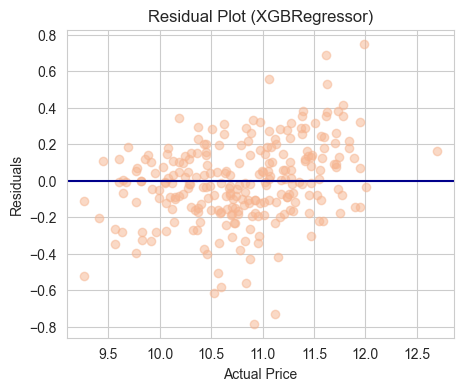

XGBRegressor Model Evaluation:
----------------------------------
R2 Score: 0.8753885595362902
Mean Absolute Error: 0.17037874290591917

Additional Information:
-----------------------
Average Actual Price: $10.793331049608089
Average Predicted Price: $10.803044319152832
Standard Deviation of Actual Price: $0.6293835414224095
Standard Deviation of Predicted Price: $0.6017769575119019


In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

# Create the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline
pipe.fit(X_train, Y_train)

# Predictions
y_pred = pipe.predict(X_test)

# Calculate metrics
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)

# Calculate residuals
residuals = Y_test - y_pred

# Plot the residuals
plt.figure(figsize=(5, 4))
plt.scatter(Y_test, residuals, alpha=0.5)
plt.title('Residual Plot (XGBRegressor)')
plt.xlabel('Actual Price')
plt.ylabel('Residuals')
plt.axhline(y=0, color='darkblue', linestyle='-')
plt.show()

print('XGBRegressor Model Evaluation:')
print('----------------------------------')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print()

# Additional information
print('Additional Information:')
print('-----------------------')
print(f'Average Actual Price: ${np.mean(Y_test)}')
print(f'Average Predicted Price: ${np.mean(y_pred)}')
print(f'Standard Deviation of Actual Price: ${np.std(Y_test)}')
print(f'Standard Deviation of Predicted Price: ${np.std(y_pred)}')



## Saving the best Accuracy Model

In [93]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))